# Projekt Machine Learning - koło naukowe KWATERNION 

**Autor: Michał Błaszczykowski**

**Cel projektu:** Celem projektu jest znalezienie optymalnego modelu klasyfikacyjnego za pomocą wybranych algorytmów uczenia maszynowego. 
Wykorzystując zbiór danych **Car Evaluation** oraz dostępne predyktory należy zweryfikować klasę samochodu osobowego.

## Opis zbioru badawczego

In [1]:
#Wczytanie podstawowych paczek.
import numpy as np
import pandas as pd
car = pd.read_csv("car.csv")
#Na początku nazwiemy kolumny naszej ramki danych.
car.columns = ["Buying","Maint","Doors","Persons","Lug_boot","Safety","Class"]
#Wyświetlimy teraz kilka wierszy rozpatrywanego zbioru danych.
car.head(6)

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc


**Opis zmiennych pochodzących ze zbioru danych:**
* **Buying** - cena zakupu samochodu:
    * **Vhigh** (bardzo wysoka)
    * **high** (wysoka)
    * **med** (średnia)
    * **low** (niska)
* **Maint** - cena utrzymania samochodu:
    * **Vhigh** (bardzo wysoka)
    * **high** (wysoka)
    * **med** (średnia)
    * **low** (niska)
* **Doors** - liczba drzwi w samochodzie:
    * **2** 
    * **3** 
    * **4** 
    * **5more** 
* **Persons** - liczba możliwych osób w samochodzie:
    * **2**  
    * **4** 
    * **more** 
* **Lug_boot** - pojemność bagażnika:
    * **small** (mała) 
    * **med** (średnia)
    * **big** (duża)
* **Safety** - poziom bezpieczeństwa:
    * **low** (niski)  
    * **med** (średni)
    * **high** (wysoki)
* **Class** - klasa samochodu:
    * **unacc** (nieakceptowalna)  
    * **acc** (akceptowalna)
    * **good** (dobra)
    * **vgood** (bardzo dobra)
    
Zmienną zależną w naszym badaniu będzie zmienna **Class**. Pozostałe zmienne to predyktory.

In [2]:
car.dtypes
#Wszystkie nasze zmienne są zmiennymi jakościowymi.
car.shape
car.describe()
#Zbiór danych zawiera 1727 obserwacji.

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


Z powyższego podsumowania odczytujemy, że dla wszystkich zmiennych niezależnych mamy praktycznie taką samą częstość występowania klas. Jeżeli chodzi o zmienną zależną to przeważającą klasą jest **unacc**, ponieważ stanowi około **70%** obserwacji.

In [3]:
car.isnull().sum()
#Nasze zmienne nie zawierają braków danych
#Z powyższej tabelki wynika również fakt, że w naszym zbiorze nie ma zmiennych stałych.

Buying      0
Maint       0
Doors       0
Persons     0
Lug_boot    0
Safety      0
Class       0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
X = car.drop(columns = ['Class'])
Y = car['Class']
one_hot_data = pd.get_dummies(X, drop_first = True)
#Zbiór uczący będzie zawierał 2/3 wszystkich obserwacji, natomiast zbiór testowy 1/3 obserwacji.
seed = 2020
Xtrain, Xtest, Ytrain, Ytest = train_test_split(one_hot_data,Y, test_size = 1/3,random_state = seed)

In [5]:
print((Ytrain.value_counts()/Ytrain.shape[0])*100)
print((Ytest.value_counts()/Ytest.shape[0])*100)
#Mamy mniej więcej takie same proporcje w klasach zmiennej wynikowej na zbiorze uczącym i zbiorze testowym
#Powinno wpłynąć to pozytywnie na klasyfikacje w naszych modelach

unacc    70.112945
acc      22.241529
vgood     3.822763
good      3.822763
Name: Class, dtype: float64
unacc    69.791667
acc      22.222222
good      4.340278
vgood     3.645833
Name: Class, dtype: float64


**Dane są przygotowane do rozpoczęcia budowy modeli klasyfikacyjnych.**

**Sprawdzimy skuteczność klasyfikacji wykorzystując następuje metody:**
* **Drzewo decyzyjne typu CART**
* **Las losowy**
* **Boosting (xgboost)**
* **Liniowa analiza dyskryminacyjna**
* **Metoda k-najbliższych sąsiadów**
* **Naiwny klasyfikator Bayesa**

## Budowa modeli klasyfikacyjnych

### Drzewo decyzyjne typu CART

In [6]:
from sklearn import tree
from sklearn.metrics import accuracy_score
model_tree = tree.DecisionTreeClassifier(random_state = seed)
model_tree.fit(Xtrain,Ytrain)
#Zbudowaliśmy model drzewa decyzyjnego na zbiorze uczącym, a teraz dokonamy predykcji na zbiorze testowym
prediction_tree = model_tree.predict(Xtest)
wynik = accuracy_score(Ytest,prediction_tree)
print("Dokładność predykcji wynosi:",np.round(wynik,2))

Dokładność predykcji wynosi: 0.9


Otrzymujemy skuteczność na poziomie około **90%** dla parametrów domyślnych, zatem jest to bardzo dobry wynik.

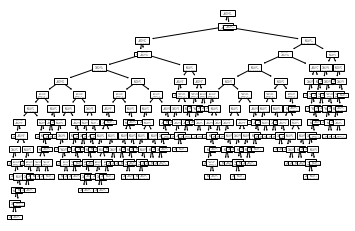

In [7]:
rysunek = tree.plot_tree(model_tree)

Powyższe drzewo jest bardzo złożoną strukturą, stąd sprawdzimy również skuteczność mniej złożonego modelu.

In [8]:
model_tree_2 = tree.DecisionTreeClassifier(max_depth = 8, min_samples_split = 20, min_samples_leaf = 5,
                                           random_state = seed)
model_tree_2.fit(Xtrain,Ytrain)
prediction_tree_2 = model_tree_2.predict(Xtest)
wynik_2 = accuracy_score(Ytest,prediction_tree_2)
print("Dokładność predykcji wynosi:",np.round(wynik_2,2))

Dokładność predykcji wynosi: 0.87


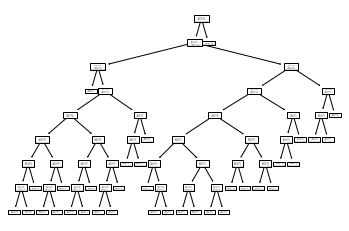

In [9]:
rysunek = tree.plot_tree(model_tree_2)

Ustawiając maksymalną głębokość drzewa na **8**, minimalną liczbę obserwacji w węźle na **20**, a w liściu na **5** udaje się  otrzymać skuteczność na poziomie **87%**. Pomimo prostoty skuteczność jest mniejsza jedynie o **3%**.

## Las losowy

**Budujemy model klasyfikacyjny wykorzystując wartości domyślne dla wszystkich parametrów.**

In [10]:
from sklearn.ensemble import RandomForestClassifier
seed = 2020
model_forest = RandomForestClassifier(random_state = seed)
model_forest.fit(Xtrain, Ytrain)
prediction_forest = model_forest.predict(Xtest)
wynik_forest = accuracy_score(Ytest,prediction_forest)
print("Dokładność predykcji wynosi:",np.round(wynik_forest,2))

Dokładność predykcji wynosi: 0.89


**Sprawdzimy teraz dokładność predykcji zmieniając pewne parametry.**

In [11]:
model_forest_2 = RandomForestClassifier(n_estimators = 1000, max_depth = 8, min_samples_split = 10,
                                        min_samples_leaf = 5, random_state = seed)
model_forest_2.fit(Xtrain, Ytrain)
prediction_forest_2 = model_forest_2.predict(Xtest)
wynik_forest_2 = accuracy_score(Ytest,prediction_forest_2)
print("Dokładność predykcji wynosi:",np.round(wynik_forest_2,2))

Dokładność predykcji wynosi: 0.84


Ustawiliśmy liczbę drzew w lesie losowym na 1000 (10 razy więcej niż domyślnie), maksymalną głębokość na 8, minimalną liczbę obserwacji w węźle na 10, natomiast w liściu na 5.
Zauważamy, że zmiana parametrów nie zwiększyła skuteczności naszego modelu.  Wyniki są gorsze niż dla  modelu zbudowanego dla wartości domyślnych.

## Boosting

Sprawdzamy dokładność metody **Boosting** dla parametrów domyślnych.

In [12]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
model_boosting = XGBClassifier(random_state = seed,verbosity = 0)
model_boosting.fit(Xtrain, Ytrain)
prediction_boosting = model_boosting.predict(Xtest)
wynik_boosting = accuracy_score(Ytest,prediction_boosting)
print("Dokładność predykcji wynosi:",np.round(wynik_boosting,2))

Dokładność predykcji wynosi: 0.96


**Dokładność metody Boosting jest o wiele lepsza od dokładności poprzednich metod.** Zmienimy teraz kilka parametrów i sprawdzimy jak zachowa się model i jego skuteczność klasyfikacji.

In [13]:
model_boosting_2 = XGBClassifier(random_state = seed, verbosity = 0, booster = "gbtree", max_depth = 10)
model_boosting_2.fit(Xtrain, Ytrain)
prediction_boosting_2 = model_boosting_2.predict(Xtest)
wynik_boosting_2 = accuracy_score(Ytest,prediction_boosting_2)
print("Dokładność predykcji wynosi:",np.round(wynik_boosting_2,2))

Dokładność predykcji wynosi: 0.95


**Jak widać mamy minimalny spadek skuteczności dla drugiego modelu, ale nadal wyniki są bardzo dobre.**

## LDA - Liniowa analiza dyskryminacyjna

W **liniowej analizie dykryminacyjnej** nie będziemy zmieniać wartości parametrów modelu, ponieważ jest ich bardzo mało i nie powinny wpłynąć znacząco na wyniki predykcji w naszym zadaniu.

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(Xtrain, Ytrain)
prediction_lda = model_lda.predict(Xtest)
wynik_lda = accuracy_score(Ytest,prediction_lda)
print("Dokładność predykcji wynosi:", np.round(wynik_lda,2))

Dokładność predykcji wynosi: 0.9


**Skuteczność dla LDA na poziomie 90%.**

## Metoda K-najbliższych sąsiadów

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(Xtrain, Ytrain)
prediction_knn = model_knn.predict(Xtest)
wynik_knn = accuracy_score(Ytest,prediction_knn)
print("Dokładność predykcji wynosi:", np.round(wynik_knn,2))

Dokładność predykcji wynosi: 0.83


**Otrzymujemy skuteczność wynoszącą 83%. Domyślna liczba "sąsiadów" wynosi 5.**

In [16]:
model_knn_2 = KNeighborsClassifier(n_neighbors = 10)
model_knn_2.fit(Xtrain, Ytrain)
prediction_knn_2 = model_knn_2.predict(Xtest)
wynik_knn_2 = accuracy_score(Ytest,prediction_knn_2)
print("Dokładność predykcji wynosi:", np.round(wynik_knn_2,2))

Dokładność predykcji wynosi: 0.84


**Dla podwojonej liczby "sąsiadów" otrzymujemy wynik lepszy o 1% jeżeli chodzi o skuteczność.**

## Naiwny klasyfikator Bayesa

Podobnie jak w **LDA** wykorzystamy tutaj tylko wartości domyślne parametrów modelu klasyfikacyjnego.

In [17]:
from sklearn.naive_bayes import GaussianNB 
model_bayes = GaussianNB()
model_bayes.fit(Xtrain, Ytrain)
prediction_bayes = model_bayes.predict(Xtest)
wynik_bayes = accuracy_score(Ytest,prediction_bayes)
print("Dokładność predykcji wynosi:", np.round(wynik_bayes,2))

Dokładność predykcji wynosi: 0.48


**Jak widać naiwny klasyfikator Bayesa kompletnie nie poradził sobie z zadaniem klasyfikacyjnym. Jego skuteczność wynosi 48%.** 

## Podsumowanie metod klasyfikacyjnych i ich skuteczności

**Skuteczność:**
1. **Model Xgboost - 96%**
2. **Drzewo Cart i LDA - 90%**
3. **Las losowy - 89%**
4. **Metoda k-najbliższych sąsiadów - 83%**
5. **Naiwny klasyfikator Bayesa - 48%**


    

W większości przypadków klasyfikacja przebiegła poprawnie i ogólnie można powiedzieć, że wyniki były dobre.
**Za model optymalny przyjmujemy oczywiście model Xgboost, który bezapelacyjnie okazał się najlepszy.**